# INSTALL DL2

In [ ]:
import numpy as np

In [ ]:
import torch
torch.manual_seed(0)
import random
random.seed(0)

# GET MODEL AND DATA

#### NEW DATA

In [ ]:
import numpy as np
import os
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import RandomSampler
import cv2
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import torchvision.models as models
import torch
from torch import nn
import time

import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PARAMS EXEC
# apply algorithm with test image with our without background
no_back_ground = True
model_no_bg = True

In [ ]:
if no_back_ground:
  TEST_PATH = '/content/drive/MyDrive/CS Work/projet CS/dataset/final_test_no_bg/'
  TRAIN_PATH = '/content/drive/MyDrive/CS Work/projet CS/dataset/data_augm_train_final_no_bg/'
else:
  TEST_PATH = '/content/drive/MyDrive/CS Work/projet CS/dataset/final_test/'
  TRAIN_PATH = '/content/drive/MyDrive/CS Work/projet CS/dataset/data_augm_train_final/'

classes = os.listdir(TEST_PATH)
classes.remove('.DS_Store')
print("Total Classes: ",len(classes))

train_count = 0
test_count = 0
for _class in classes:
    train_count += len(os.listdir(TRAIN_PATH + _class))
    test_count += len(os.listdir(TEST_PATH + _class))

print("Total train images: ",train_count)
print("Total test images: ",test_count)

Total Classes:  10
Total train images:  2614
Total test images:  109


In [ ]:
# get paths (with. name of each image)
train_imgs = []
test_imgs = []

for _class in classes:
    
    for img in os.listdir(TRAIN_PATH + _class):
        if img != '.DS_Store':
          train_imgs.append(TRAIN_PATH + _class + "/" + img)
        
    for img in os.listdir(TEST_PATH + _class):
      if img != '.DS_Store':
        test_imgs.append(TEST_PATH + _class + "/" + img)

class_to_int = {classes[i] : i for i in range(len(classes))}

In [ ]:
### Loading Classification Dataset - FOR METHOD 2: For multi-class data, by inheriting Dataset class

def get_transform():
    return T.Compose([T.ToTensor()])

class BirdDataset(Dataset):
    
    def __init__(self, imgs_list, class_to_int, transforms = None):
        
        super().__init__()
        self.imgs_list = imgs_list
        self.class_to_int = class_to_int
        self.transforms = transforms
        
        
    def __getitem__(self, index):
        transform = T.Resize(size = (224, 224))
        image_path = self.imgs_list[index]
        
        #Reading image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0

        
        #Retriving class label
        label = image_path.split("/")[-2]
        #print("label : " + str(label))
        label = self.class_to_int[label]
        
        #Applying transforms on image
        if self.transforms:
            image = self.transforms(image)
        
        image = transform(image)
        return image, label
        
        
        
    def __len__(self):
        return len(self.imgs_list)

In [ ]:
# Method 2: Using Dataset Class
train_dataset = BirdDataset(train_imgs, class_to_int, get_transform())
test_dataset = BirdDataset(test_imgs, class_to_int, get_transform())

#Data Loader  -  using Sampler (YT Video)
train_random_sampler = RandomSampler(train_dataset)
test_random_sampler = RandomSampler(test_dataset)

In [ ]:
#Shuffle Argument is mutually exclusive with Sampler!
train_iter = DataLoader(
    dataset = train_dataset,
    batch_size = 16,
    sampler = train_random_sampler,
    num_workers = 4,
)

test_iter = DataLoader(
    dataset = test_dataset,
    batch_size = 16,
    sampler = test_random_sampler,
    num_workers = 4,
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
import os
from torchvision.utils import make_grid
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
## load mnist dataset
use_cuda = torch.cuda.is_available()

root = './data'
if not os.path.exists(root):
    os.mkdir(root)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


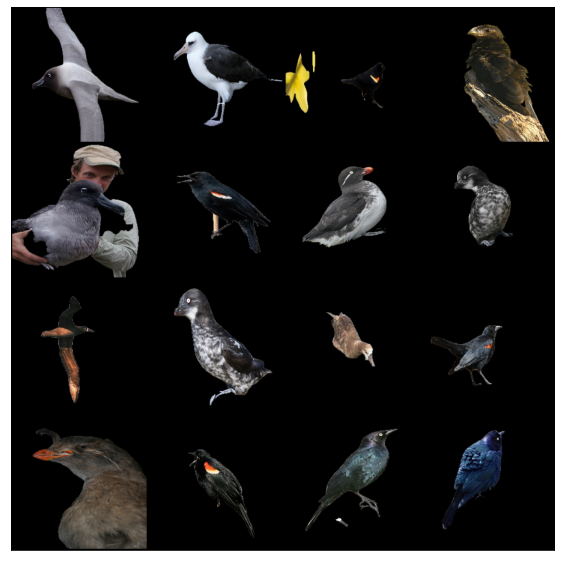

In [ ]:
for images, labels in test_iter:
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
torch.cuda.empty_cache()
# load the model

if model_no_bg :
  print("Model train with no BG load")
  model2 = torch.load("/content/drive/MyDrive/CS Work/projet CS/dataset/VGG16_nobg.pt")
else :
  model2 = torch.load("/content/drive/MyDrive/CS Work/projet CS/dataset/VGG16.pt")

Model train with no BG load


In [ ]:
model2.to(device)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# get a batch
batch = next(iter(test_iter))
# indice 0 -> 7 indice 1 - > 2
batch[0] = batch[0].to(device) 
pred = model2(batch[0])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0


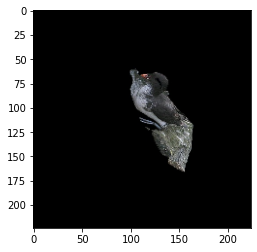

1


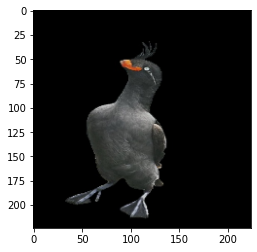

2


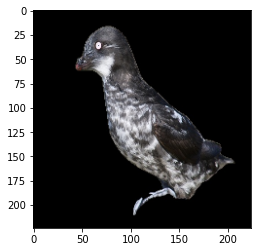

3


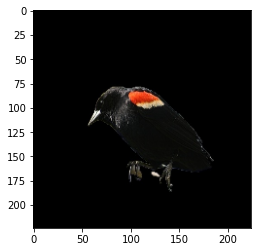

4


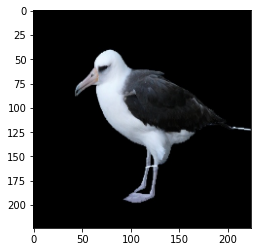

5


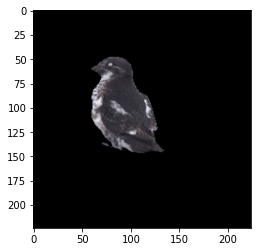

6


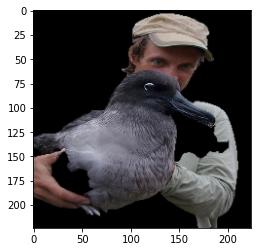

7


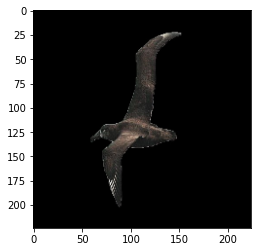

8


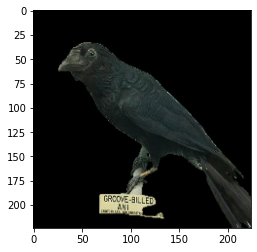

9


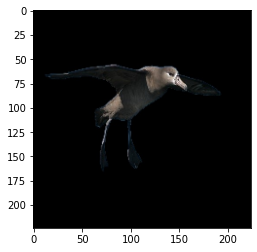

10


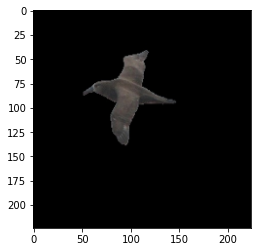

11


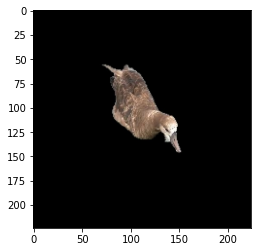

12


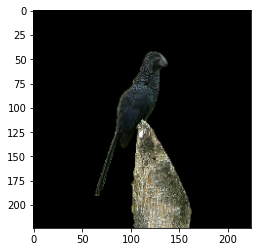

13


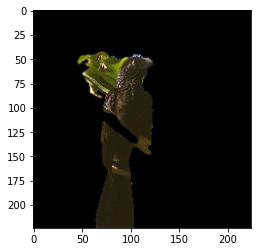

14


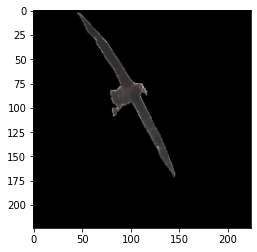

15


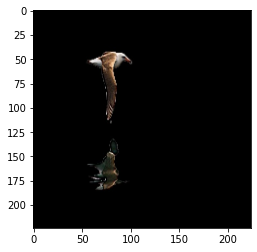

In [ ]:
for i in range(16):
  print(i)
  plt.imshow(batch[0][i].permute(1,2,0).tolist())
  plt.show()


# SPLIT OF THE NET (FEATURE EXTRACTOR AND CLASSIFIER)

In [ ]:
feature_extractor = model2.features #model2.features[:-1]
feature_extractor.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [ ]:
classifier = model2.classifier #nn.Sequential(model2.features[-1], model2.classifier)
classifier.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=25088, out_features=2048, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=2048, out_features=524, bias=True)
  (5): ReLU(inplace=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=524, out_features=10, bias=True)
)

# EXTRACT FEATURES

In [ ]:
batch[0].to(device).shape

torch.Size([16, 3, 224, 224])

In [ ]:
batch[0].to(device)
features = feature_extractor(batch[0])
features.shape

torch.Size([16, 512, 7, 7])

# Utils functions

In [ ]:
def reshape_features(features):
  feat_reshape = features.reshape(
      ( features.shape[0],  features.shape[1],  features.shape[2] * features.shape[3])
      )
  return feat_reshape

#shape_0_feat_reshape = torch.zeros(feat_reshape.shape)

In [ ]:
def reshape_for_classifier(new_features):
  new_features_reshape = new_features.reshape(
                ( new_features.shape[0],  new_features.shape[1],
                int(np.sqrt(new_features.shape[2])), int(np.sqrt(new_features.shape[2])))
                )
  return new_features_reshape

# FOUND THE COMBINAISON OF MODIFICATION

In [ ]:
features = feature_extractor(batch[0])
features.shape

torch.Size([16, 512, 7, 7])

In [ ]:
features_reshape = reshape_features(features)

In [ ]:
features_reshape.shape

torch.Size([16, 512, 49])

In [ ]:
# get the number of features to try to make all possibles combinaisons
number_features = features_reshape.shape[2]

In [ ]:
# indice 0 -> 9 indice 1 - > 3
modif_indice = 3 # indice on the batch of the element modify
inserting_indice = 5 # indice in the batch of the element which injected

source_class = int(torch.argmax(classifier(features)[modif_indice])) # argmax for the inserting_indice 
arg_inserting = int(torch.argmax(classifier(features)[inserting_indice])) # argmax for the inserting_indice 
print("pred for inserting : "+str(arg_inserting))
print("pred for modif : "+str(source_class))

best_pred = float(classifier(features)[0][2])
best_injection_tuple = (0,0)

# list possible injection and inserting index
list_possible_injection_modif_indice = list(range(number_features))
list_possible_injection_inserting_indice = list(range(number_features))

# list of all modifications

all_tuple_of_injection = []


pred for inserting : 9
pred for modif : 0


In [ ]:
# check the prediction before doing the modifications for the modif
source_class = torch.argmax(classifier(features)[modif_indice]).item()
source_class

0

In [ ]:
# check the prediction before doing the modifications for the inserting
target_class = torch.argmax(classifier(features)[inserting_indice]).item()
target_class

9

In [ ]:
def found_best_edit(features_reshape,
                    modif_indice,
                    inserting_indice,
                    arg_inserting,
                    best_pred,
                    best_injection_tuple,
                    list_possible_injection_modif_indice,
                    list_possible_injection_inserting_indice,
                    all_tuple_of_injection,
                    source_class):
  """
  function which try each possible combinaison of modif_indic and inserting_indice
  to maximise the prediction of the injection image
  """
  pred_has_not_changed = True
  # we want a least on change
  best_pred = float('-inf')

  # counter sur le nombre de modification interessantes
  counter_modif = 0
  # try all combinaison


  for i in list_possible_injection_modif_indice:
    for j in list_possible_injection_inserting_indice:
      injection_modif_indice = i # index of the part of the image that will be replaced
      injection_inserting_indice = j  # index of the part of the image that will be injected

      new_features = features_reshape.clone() # copy of the features_reshape
      # add new value
      for k in range(features_reshape.shape[1]):
        # Change is made for each layer
        new_features[modif_indice][k][injection_modif_indice] = features_reshape[inserting_indice][k][injection_inserting_indice]
      # reshape
      new_features_reshape = reshape_for_classifier(new_features)

      # Prediction with the new feat
      preds = classifier(new_features_reshape)
      pred = preds[modif_indice][arg_inserting].item()

      #print("Prediction : "+str(preds[modif_indice].argmax()))
      
      # check if the pred has change (we can return directly)
      if preds[modif_indice].argmax() == arg_inserting :
        #print("prediction of imlage got class of inserting image : early stop", preds[modif_indice].argmax())
        all_tuple_of_injection.append(best_injection_tuple)
        best_injection_tuple = (injection_modif_indice, injection_inserting_indice)
        list_possible_injection_modif_indice.remove(best_injection_tuple[0])
        list_possible_injection_inserting_indice.remove(best_injection_tuple[1])
        print("PRED HAS CHANGE WITH TUPLE"+ str(best_injection_tuple))
        print("THE PROCESS HAVE TO STOP")
        pred_has_not_changed = False
        return new_features, pred, best_injection_tuple, list_possible_injection_modif_indice, list_possible_injection_inserting_indice, all_tuple_of_injection, pred_has_not_changed

      # check if the pred is interesting
      if pred >= best_pred:
        #print("modif trouvée pour la modif : "+str(counter_modif))
        counter_modif = counter_modif + 1
        best_pred = pred
        best_injection_tuple = (injection_modif_indice, injection_inserting_indice)
        #print("nouvelle meilleure pred : "+str(pred))

  # check if
  if counter_modif == 0 :
    print("WARNING : NOT ANY INTERESTING MODIFICATION")

  # update features_reshape with the best transformation
  for k in range(features_reshape.shape[1]):
    # for each layer
    features_reshape[modif_indice][k][best_injection_tuple[0]] = features_reshape[inserting_indice][k][best_injection_tuple[1]]
  # remove element selected in lists of possible injections
  #print("best injection : "  + str(best_injection_tuple))
  list_possible_injection_modif_indice.remove(best_injection_tuple[0])
  list_possible_injection_inserting_indice.remove(best_injection_tuple[1])

  all_tuple_of_injection.append(best_injection_tuple)

  print("Size of list of possible injections : "+ str(len(list_possible_injection_modif_indice)))
  print("TUPLE"+ str(best_injection_tuple))
  print("list possible modif : "+ str(list_possible_injection_modif_indice))
  print("list possible insert : "+ str(list_possible_injection_inserting_indice))

  # return new values
  return features_reshape, best_pred, best_injection_tuple, list_possible_injection_modif_indice, list_possible_injection_inserting_indice, all_tuple_of_injection, pred_has_not_changed


### Made edit until the prediction change

In [ ]:
# Doing the modifications until the chnage in the predicitions
pred_has_not_changed = True

counter_nb_modif = 0

while pred_has_not_changed :

  features_reshape, best_pred, best_injection_tuple,\
  list_possible_injection_modif_indice,\
    list_possible_injection_inserting_indice, all_tuple_of_injection, pred_has_not_changed = found_best_edit(features_reshape,
                      modif_indice,
                      inserting_indice,
                      arg_inserting,
                      best_pred,
                      best_injection_tuple,
                      list_possible_injection_modif_indice,
                      list_possible_injection_inserting_indice,
                      all_tuple_of_injection,
                      source_class)

  # print the nb of modification
  counter_nb_modif = counter_nb_modif + 1
  print("Number of modifications : "+ str(counter_nb_modif))
  # tcheck if the val of prediction has change
  if torch.argmax(classifier(reshape_for_classifier(features_reshape))[modif_indice]) == arg_inserting :
    print("break actived")
    break

Size of list of possible injections : 48
TUPLE(24, 23)
list possible modif : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
list possible insert : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Number of modifications : 1
Size of list of possible injections : 47
TUPLE(29, 16)
list possible modif : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
list possible insert : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Number of modifications : 2
Size of list of poss

In [ ]:
features_reshape.shape

torch.Size([16, 512, 49])

In [ ]:
 # all injection
all_tuple_of_injection

[(24, 23),
 (29, 16),
 (25, 22),
 (30, 24),
 (31, 30),
 (23, 15),
 (5, 9),
 (39, 31),
 (16, 17)]

In [ ]:
torch.argmax(classifier(reshape_for_classifier(features_reshape))[modif_indice])

tensor(9, device='cuda:0')

# Translate the modification in the new coordinates : 

In [ ]:
def index_to_coordinates(index_test, size_shape):
  """
  function that translates the change coordinates in the tensor reshape into the original coordinates
  index_test : val of index in the the reshape tensor
  size_shape : size of the original shape (ex : 4 for a 4*4)
  """
  #index_test = index_test
  # columns indice
  col_indice = (index_test) % size_shape
  # line indice
  line_indice = int((index_test)/ size_shape)

  return (line_indice, col_indice)


In [ ]:
def get_original_indexes(indexes, INPUT_1, OUTPUT_SIZE):
    size_ratio = (int(INPUT_1[0]/OUTPUT_SIZE[0]), int(INPUT_1[1]/OUTPUT_SIZE[1]))
    original_indexes = []
    #print(size_ratio)

    for index in indexes:
        for i in range(size_ratio[0]):
            for j in range(size_ratio[1]):
                new_index = [index[0]*size_ratio[0], index[1]*size_ratio[1]]
                if new_index[0] + i < INPUT_1[0]:
                    new_index[0] += i
                if new_index[1] + j < INPUT_1[1]:
                    new_index[1] += j
                original_indexes.append(new_index)
    return original_indexes

In [ ]:
get_original_indexes([(0,0)], (28,28), (4,4))

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [4, 5],
 [4, 6],
 [5, 0],
 [5, 1],
 [5, 2],
 [5, 3],
 [5, 4],
 [5, 5],
 [5, 6],
 [6, 0],
 [6, 1],
 [6, 2],
 [6, 3],
 [6, 4],
 [6, 5],
 [6, 6]]

In [ ]:
import matplotlib.pyplot as plt
def visualize_transformation(original_indexes, original_image):
    original_image = original_image.permute(1,2,0).tolist()
    highlighted_image = original_image.copy()



    for i,j in original_indexes:
      try:
        for k in range(3):
          highlighted_image[i][j][k] = max((highlighted_image[i][j][k]+0.3),1)
      except :
        print("impossible : "+str(i)+str(j))


    plt.imshow(highlighted_image)
    plt.show()
    
    return highlighted_image


In [ ]:
all_tuple_of_injection

[(24, 23),
 (29, 16),
 (25, 22),
 (30, 24),
 (31, 30),
 (23, 15),
 (5, 9),
 (39, 31),
 (16, 17)]

In [ ]:
injection_first_image = [x[0] for x in all_tuple_of_injection]
injection_second_image = [x[1] for x in all_tuple_of_injection]
injection_first_image
injection_second_image

[23, 16, 22, 24, 30, 15, 9, 31, 17]

In [ ]:
# conversion des coordonnées de shape (16,) à (4,4) (par exemple)
size_shape = 7
coordinates_injection_first_image =  [index_to_coordinates(x, size_shape) for x in injection_first_image]
coordinates_injection_second_image =  [index_to_coordinates(x, size_shape) for x in injection_second_image]

coordinates_injection_first_image
coordinates_injection_second_image

[(3, 2), (2, 2), (3, 1), (3, 3), (4, 2), (2, 1), (1, 2), (4, 3), (2, 3)]

In [ ]:
# original indexes
INPUT_1 = (224,224)
OUTPUT_SIZE = (7,7)

In [ ]:
# get the original coordinates
index_original_coordinates_first_image = get_original_indexes(coordinates_injection_first_image, INPUT_1, OUTPUT_SIZE)
index_original_coordinates_second_image = get_original_indexes(coordinates_injection_second_image, INPUT_1, OUTPUT_SIZE)

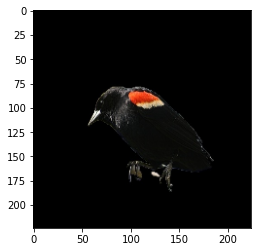

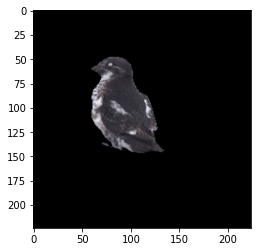

In [ ]:
# get the original images
"""
modif_indice = 13
inserting_indice =1
"""
original_first_image = batch[0][modif_indice]
original_second_image = batch[0][inserting_indice]

# plot
plt.figure()
plt.imshow(original_first_image.permute(1,2,0).tolist())
plt.figure()
plt.imshow(original_second_image.permute(1,2,0).tolist())

In [ ]:
inserting_indice, modif_indice

(5, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


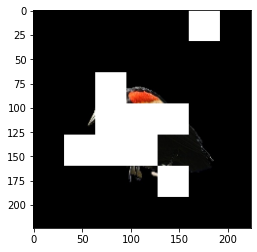

In [ ]:
img = visualize_transformation(index_original_coordinates_first_image, original_first_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


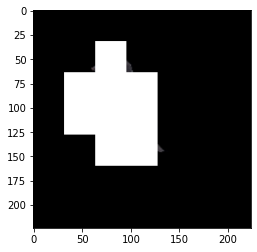

In [ ]:
img2 = visualize_transformation(index_original_coordinates_second_image, original_second_image)

# Combining images

In [ ]:
def combine_images(original_first_image, original_second_image, INPUT_1, OUTPUT_SIZE):
  """
  function thet matches by injecting the parts of the image 2 in the image 1
  params:
    original_first_image: the first image (modif image)
    original_second_image: the second image (injecting image)
    INPUT_1: size of the input image in the net (ex : (28,28))
    OUTPUT_SIZE : size of the output at the end of the feature extractor (ex: (4,4))

  """
  #original_second_image used also
  original_image_test = original_first_image.permute(1,2,0).tolist()
  printed_image = original_image_test.copy()
  # change struct sec image
  original_second_image = original_second_image.permute(1,2,0).tolist()
  for k in range(len(coordinates_injection_first_image)):
    first_image = get_original_indexes(coordinates_injection_first_image[k:k+1], INPUT_1, OUTPUT_SIZE)
    second_image = get_original_indexes(coordinates_injection_second_image[k:k+1], INPUT_1, OUTPUT_SIZE)

    # les indexes are sorted by columns and by line before doing the matching
    first_image = sorted(first_image, key=lambda x: x[1])
    first_image = sorted(first_image, key=lambda x: x[0])

    # les indexes are sorted by columns and by line before doing the matching
    second_image = sorted(second_image, key=lambda x: x[1])
    second_image = sorted(second_image, key=lambda x: x[0])

    # replace elements
    if len(first_image) != len(second_image):
      print("Error of size in the matching of pixels for the index of transformation: "+str(k))

    for i in range(len(first_image)):
      for l in range(3):
          printed_image[ first_image[i][0]][ first_image[i][1]][l] = original_second_image[second_image[i][0]][second_image[i][1]][l]

  plt.imshow(printed_image)
  plt.show()


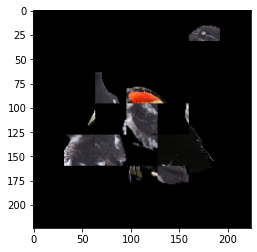

In [ ]:
combine_images(original_first_image, original_second_image, INPUT_1, OUTPUT_SIZE)